In [232]:
from urllib import request
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [99]:
if not os.path.isdir(HOUSING_PATH):
    os.makedirs(HOUSING_PATH)
tgz_path = os.path.join(HOUSING_PATH, "housing.tgz")

urllib.request.urlretrieve(HOUSING_URL, tgz_path)

housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path = HOUSING_PATH)
housing_tgz.close()

NameError: name 'urllib' is not defined

In [161]:
print(os.getcwd())

C:\Users\SAMARNA\Documents\Learning\Untitled Folder


In [162]:
housing = pd.read_csv("datasets\housing\housing.csv")

In [163]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [164]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [165]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [166]:
housing.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640,NaN,NaN,NaN,-119.57,2.00353,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640,NaN,NaN,NaN,35.6319,2.13595,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640,NaN,NaN,NaN,28.6395,12.5856,1,18,29,37,52
total_rooms,20640,NaN,NaN,NaN,2635.76,2181.62,2,1447.75,2127,3148,39320
total_bedrooms,20433,NaN,NaN,NaN,537.871,421.385,1,296,435,647,6445
population,20640,NaN,NaN,NaN,1425.48,1132.46,3,787,1166,1725,35682
households,20640,NaN,NaN,NaN,499.54,382.33,1,280,409,605,6082
median_income,20640,NaN,NaN,NaN,3.87067,1.89982,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640,NaN,NaN,NaN,206856,115396,14999,119600,179700,264725,500001
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


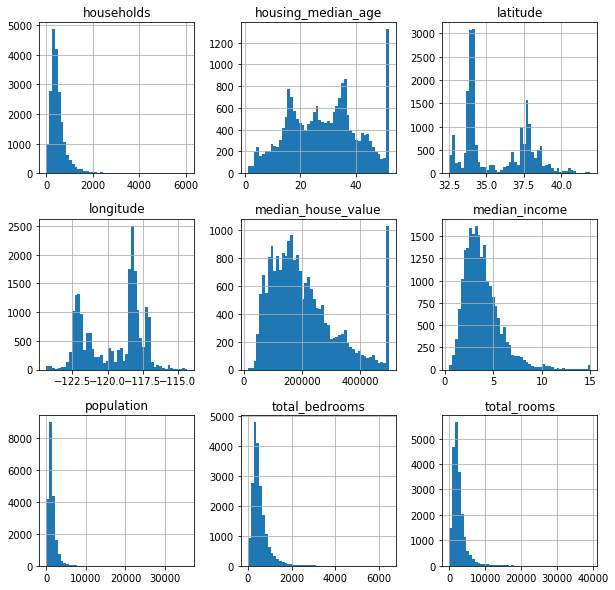

In [233]:
housing.hist(bins = 50, figsize = (10, 10))
plt.show()

## Stratified vs Random Sampling

In [168]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

In [169]:
overall = housing["income_cat"].value_counts() / len(housing)

In [170]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, random_state = 42, test_size = 0.2)
random = test_set["income_cat"].value_counts() / len(test_set)

In [171]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
stratified = strat_test_set["income_cat"].value_counts() / len(strat_test_set)

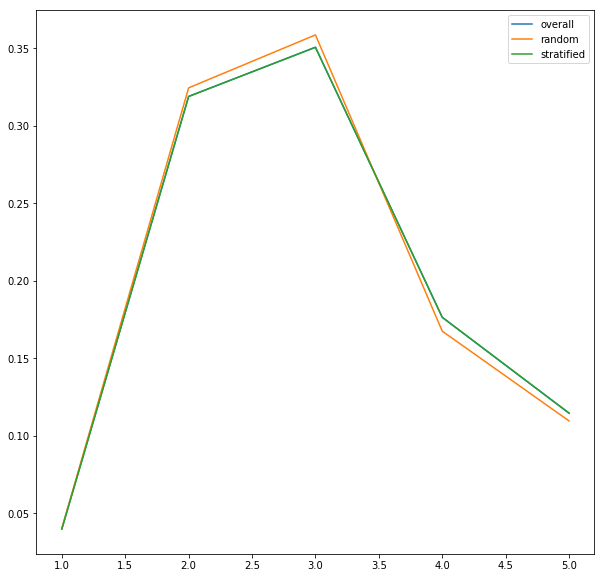

In [255]:
list_of_series = [overall, random, stratified]

comparison = pd.concat(list_of_series, axis = 1)
comparison.columns = ["overall", "random", "stratified"]
comparison.sort_index(inplace = True)

comparison.plot.line(figsize = (10, 10))
plt.show()

In [173]:
#drop income_cat column

housing.drop("income_cat", axis = 1, inplace = True)
strat_train_set.drop("income_cat", axis = 1, inplace = True)
strat_test_set.drop("income_cat", axis = 1, inplace = True)
train_set.drop("income_cat", axis = 1, inplace = True)
test_set.drop("income_cat", axis = 1, inplace = True)

c:\python\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Visualization

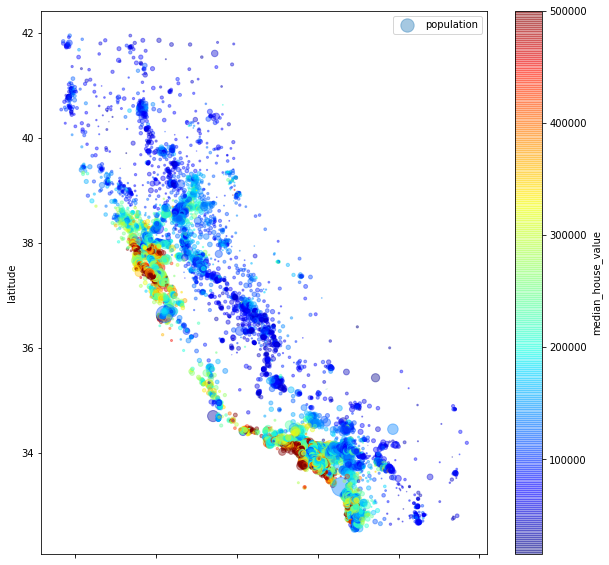

In [254]:
housing.plot.scatter(x = "longitude", 
                     y = "latitude", 
                     figsize = (10, 10),
                     alpha = 0.4, 
                     s = housing["population"] / 100, 
                     label = "population", 
                     c = "median_house_value", 
                     cmap = plt.get_cmap("jet"), colorbar = True)

plt.show()

# Correlation

In [226]:
corr_matrix = housing.corr()

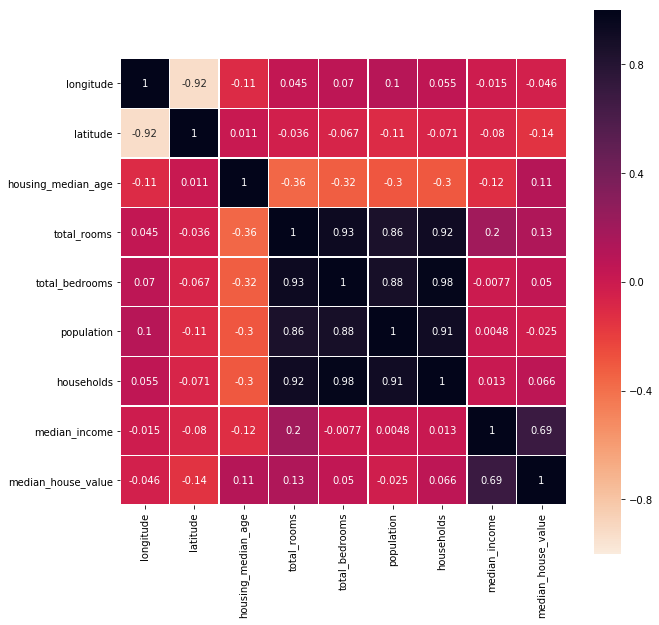

In [250]:
import seaborn as sns

plt.figure(figsize= (10, 10))
sns.heatmap(corr_matrix, 
            vmin = -1, 
            vmax = 1, 
            square = True, 
            annot = True, 
            linewidths=0.5, 
            cmap = sns.cm.rocket_r)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000884F6550>,
      dtype=object)

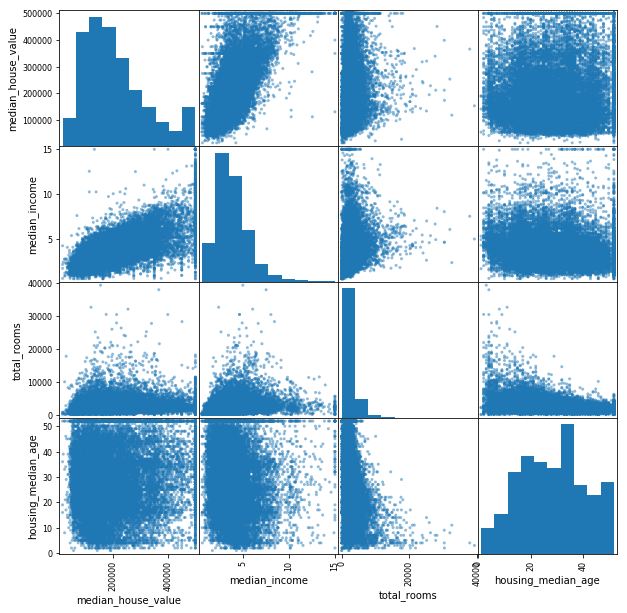

In [253]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

pd.plotting.scatter_matrix(housing[attributes], figsize = (10, 10))